# CSE 555 - Pattern Recognition
## Programming Assignment 5 - Generative Models
### Siddheswar Chandrasekhar
<br>

In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Author: Siddheswar C
# @Email: innocentdevil.sid007@gmail.com


import numpy as np
import tensorflow as tf
from tensorflow_probability import distributions
from matplotlib import pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.neural_network import BernoulliRBM
from tqdm import tqdm


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Part 1 Restricted Boltzmann Machine

In the case of restricted Boltzmann machines, Long and Servedio (2010) formally proved that the partition function Z is intractable. The intractable partition function Z implies that the normalized joint probability distribution P (v) is also intractable to evaluate. Though P(v) is intractable, the bipartite graph structure of the RBM has the special property that visible and hidden units are conditionally independent given one-another. Therefore:
\begin{equation}
P(h|v) = \frac{P(h,v)}{P(v)}
       = \frac{1}{P(v)} \frac{1}{Z} exp\{b^{T} v + c^{T} h + v^{T} W h\}
\end{equation}

\begin{equation}
    = \frac{1}{Z'} \Pi_j exp \{ c_j h_j + v^T W_j h_j\}
\end{equation}

Therefore:
\begin{equation}
P(h_j = 1|v) = \sigma(c_j + v^T W_j )
\end{equation}

\begin{equation}
P(h_j = 1,v) = \frac{\hat{P}(h_j = 1,v)}{\hat{P}(h_j = 0,v) + \hat{P}(h_j = 1,v)}
             = \frac{exp\{c_j + v^T W_j \}}{exp\{0\} + exp\{c_j + v^T W_j \}}
\end{equation}

\begin{equation}
    = \frac{1}{Z'} exp\{\Sigma_j c_j h_j + \Sigma_j v^T W_j h_j \}
\end{equation}

Similary we can say that:
\begin{equation}
P(v|h) = \frac{1}{Z'} \Pi_k exp \{b_k + h^T W_k \}
\end{equation}

Therefore:
\begin{equation}
P(v_k = 1|h) = \sigma(b_k + h^T W_k)
\end{equation}

\begin{equation}
    = \frac{1}{Z'} exp\{c^T h + v^{T} W h\}
\end{equation}


In [0]:
class RBM:
  
    def __init__(self, images, n_components, learning_rate, batch_size, n_iter, random_state):
        self.images = images
        self.batch_size = batch_size
        self.epochs = n_iter
        self.x = 0
        self.rbm = BernoulliRBM(
            n_components=n_components,
            learning_rate=learning_rate,
            batch_size=batch_size,
            n_iter=self.epochs,
            random_state=random_state,
            verbose=1)
        
    def fit(self):
        self.x, _ = self.images.train.next_batch(self.batch_size)
        self.rbm.fit(self.x)
        
    def gibbs_sampling(self, k):
        for i in range(k):
            gibbs_x = self.rbm.gibbs(self.x)
            self.x = np.zeros_like(self.x)
            self.x[gibbs_x] = 1
        return self.x

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
[B

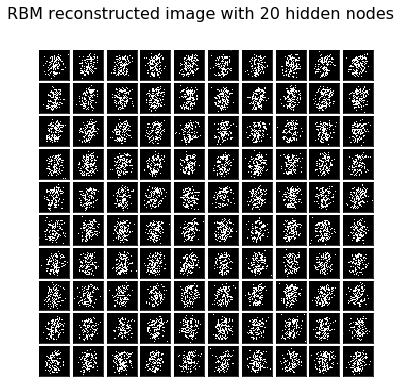

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[BernoulliRBM] Iteration 1, pseudo-likelihood = -490.20, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -470.11, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -452.55, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -436.46, time = 0.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -422.80, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -413.00, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -408.42, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -406.12, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -399.91, time = 0.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -390.81, time = 0.02s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -372.56, time = 0.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -350.12, 

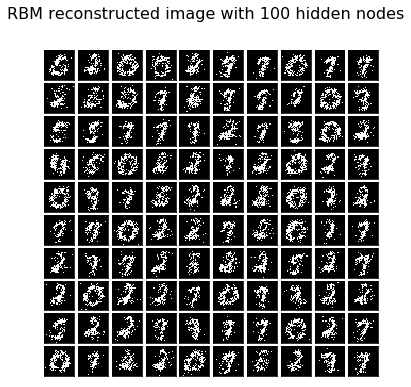

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
[BernoulliRBM] Iteration 1, pseudo-likelihood = -322.14, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -287.57, time = 0.05s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -257.99, time = 0.05s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -239.76, time = 0.05s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -227.93, time = 0.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -222.69, time = 0.06s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -214.32, time = 0.05s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -211.33, time = 0.05s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -207.26, time = 0.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -205.46, time = 0.05s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -204.42, time = 0.06s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -201.65, 

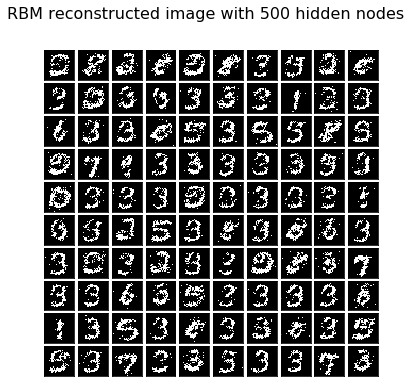

In [0]:
num_hidden_nodes_list = [20, 100, 500]

for num_hidden_nodes in num_hidden_nodes_list:
    rbm = RBM(images=input_data.read_data_sets("data", one_hot=True),
          n_components=num_hidden_nodes,
          learning_rate=0.02,
          batch_size=100,
          n_iter=1000,
          random_state=0)
    
    rbm.fit()
    gen_x = rbm.gibbs_sampling(1000)

    plt.figure(figsize=(6, 6))
    for i, comp in enumerate(gen_x):
        plt.subplot(10, 10, i+1)
        plt.imshow(comp.reshape((28, 28)), cmap="gray", interpolation='nearest')
        plt.xticks(())
        plt.yticks(())
    plt.suptitle("RBM reconstructed image with " + str(num_hidden_nodes) + \
                 " hidden nodes", fontsize=16)
    plt.subplots_adjust(wspace=0.1,hspace=0.1)
    plt.savefig("RBM reconstructed image with " + str(num_hidden_nodes) + " hidden nodes.png")
    plt.show()

## Part 2 Variational Auto Encoder Code Units

In [0]:
class VAE:

    def __init__(self, images, code_units):
        self.images = images
        self.data = tf.placeholder(tf.float32, [None, 28, 28])
        self.code_units = code_units
        posterior = self.encode()
        self.sample_r = posterior.sample()
        prior = self.make_prior()
        
        likelihood = self.decode(
            self.sample_r, [28, 28]).log_prob(self.data)
        
        divergence = distributions.kl_divergence(posterior, prior)
        self.evidence = tf.reduce_mean(likelihood - divergence)
        self.optimize = tf.train.AdamOptimizer(0.001).minimize(-self.evidence)
        
        self.samples = self.decode(
            prior.sample(10), [28, 28]).mean()

    def encode(self):
        with tf.variable_scope('encoder', reuse=tf.AUTO_REUSE):
            mean = tf.layers.dense(
                tf.layers.dense(
                    tf.layers.dense(
                        tf.layers.flatten(self.data), 784, tf.nn.relu
                    ), 256, tf.nn.relu
                ), self.code_units
            )
            
            variance = tf.layers.dense(
                tf.layers.dense(
                    tf.layers.dense(
                        tf.layers.flatten(self.data), 784, tf.nn.relu
                    ), 256, tf.nn.relu
                ), self.code_units, tf.nn.softplus
            )
      
            return distributions.MultivariateNormalDiag(mean, variance)

    def make_prior(self):
        mean = tf.zeros(self.code_units)
        variance = tf.ones(self.code_units)
        return distributions.MultivariateNormalDiag(mean, variance)

    @staticmethod
    def decode(code, data_shape):
        with tf.variable_scope('decoder', reuse=tf.AUTO_REUSE):
            logit = tf.reshape(
                tf.layers.dense(
                    tf.layers.dense(
                        tf.layers.dense(code, 256, tf.nn.relu), 784, tf.nn.relu
                    ), np.prod(data_shape) 
                ), [-1] + data_shape
            )
  
            return distributions.Independent(distributions.Bernoulli(logit), 2)

    def generate_images(self, epochs):
        with tf.train.MonitoredSession() as sess:
            for epoch in range(epochs):
                plt.clf()
                feed = {self.data:
                        self.images.test.images.reshape([-1, 28, 28])}
                
                test_evidence, test_codes, test_samples = sess.run(
                    [self.evidence, self.sample_r, self.samples], feed)
                
                print('\nEpoch ' + str(epoch + 1) + ' for ' + \
                      str(self.code_units) + ' code units')
                print("Evidence lower bound: ", test_evidence)

                for _ in range(self.images.train.num_examples // 100):
                    feed = {self.data:
                            self.images.train.next_batch(100)[0].reshape(
                                [-1, 28, 28])}
                    sess.run(self.optimize, feed)
                
                fig, axes = plt.subplots(
                    figsize=(20, 4), 
                    nrows=1, 
                    ncols=10, 
                    sharey=True, 
                    sharex=True
                )

                for ax, img in zip(axes.flatten(), test_samples[0:]):
                    ax.xaxis.set_visible(False)
                    ax.yaxis.set_visible(False)
                    ax.imshow(img.reshape((28, 28)), cmap="gray")
                fig.tight_layout(pad=0.1)
                fig.suptitle('Epoch ' + str(epoch+1), fontsize=16)
                plt.savefig('VAE ' + str(self.code_units) + ' code units - ' \
                            + str(epoch + 1) + ' Epochs.png')
                # plt.show()

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Epoch 1 for 2 code units
Evidence lower bound:  -543.67365

Epoch 2 for 2 code units
Evidence lower bound:  -165.93463

Epoch 3 for 2 code units
Evidence lower bound:  -157.20369

Epoch 4 for 2 code units
Evidence lower bound:  -152.61115

Epoch 5 for 2 code units
Evidence lower bound:  -150.26685

Epoch 6 for 2 code units
Evidence lower bound:  -149.03185

Epoch 7 for 2 code units
Evidence lower bound:  -146.93817

Epoch 8 for 2 code units
Evidence lower bound:  -

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.

Epoch 1 for 8 code units
Evidence lower bound:  -545.9585

Epoch 2 for 8 code units
Evidence lower bound:  -124.88777

Epoch 3 for 8 code units
Evidence lower bound:  -117.48533

Epoch 4 for 8 code units
Evidence lower bound:  -114.14074

Epoch 5 for 8 code units
Evidence lower bound:  -111.9505

Epoch 6 for 8 code units
Evidence lower bound:  -110.0052

Epoch 7 for 8 code units
Evidence lower bound:  -108.94956

Epoch 8 for 8 code units
Evidence lower bound:  -108.27722

Epoch 9 for 8 code units
Evidence lower bound:  -108.148026

Epoch 10 for 8 code units
Evidence lower bound:  -106.84815

Epoch 11 for 8 code units
Evidence lower bound:  -106.57811

Epoch 12 for 8 code units
Evidence lower bound:  

<Figure size 432x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

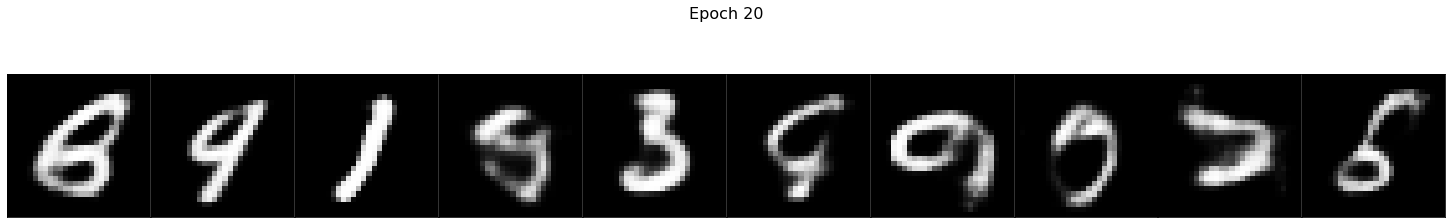

In [0]:
code_unit_list = [2, 8, 16]

for code_unit in code_unit_list:
    tf.reset_default_graph()
    vae = VAE(input_data.read_data_sets("data", one_hot=True), code_unit)
    vae.generate_images(epochs=20)

## Part 3 Varitational Auto Encoder CNN

In [0]:
class VAEConvolutionalNeuralNet:

    def __init__(self, images, input_shape, output_shape):
        self.images = images
        inputmatx, inputmaty = input_shape
        outputmatx, outputmaty = output_shape
        self.inputTensor = tf.placeholder(
            tf.float32,
            [None, inputmatx, inputmaty, 1]
        )
        self.outputTensor = tf.placeholder(
            tf.float32,
            [None, outputmatx, outputmaty, 1]
        )
        self.encoder_out = 0
        self.decoder_out = 0
        self.logits = 0
        self.cost = 0
        self.optimizer = 0
    
    def encode(self):
        self.encoder_out = tf.layers.conv2d(
            self.inputTensor,
            64,
            kernel_size=(3,3),
            padding='same',
            activation=tf.nn.relu
        )
  
        self.encoder_out = tf.layers.max_pooling2d(
            self.encoder_out,
            pool_size=(2,2),
            strides=(2,2),
            padding='same'
        )
    
        self.encoder_out = tf.layers.conv2d(
            self.encoder_out,
            32,
            kernel_size=(3,3),
            padding='same',
            activation=tf.nn.relu
        )
      
        self.encoder_out = tf.layers.max_pooling2d(
            self.encoder_out,
            pool_size=(2,2),
            strides=(2,2),
            padding='same'
        )
        
        self.encoder_out = tf.layers.conv2d(
            self.encoder_out,
            16,
            kernel_size=(3,3),
            padding='same',
            activation=tf.nn.relu
        )
        
        self.encoder_out = tf.layers.max_pooling2d(
            self.encoder_out,
            pool_size=(2,2),
            strides=(2,2),
            padding='same'
        )

        
    def decode(self):
        self.decoder_out = tf.image.resize_nearest_neighbor(
            self.encoder_out, (7,7))
  
        self.decoder_out = tf.layers.conv2d(
            self.decoder_out,
            16,
            kernel_size=(3,3),
            padding='same',
            activation=tf.nn.relu)
        
        self.decoder_out = tf.image.resize_nearest_neighbor(
            self.decoder_out, (14,14)
        )
       
        self.decoder_out = tf.layers.conv2d(
            self.decoder_out,
            32,
            kernel_size=(3,3),
            padding='same',
            activation=tf.nn.relu)
        
        self.decoder_out = tf.image.resize_nearest_neighbor(
            self.decoder_out, (28,28)
        )
        
        self.decoder_out = tf.layers.conv2d(
            self.decoder_out,
            64,
            kernel_size=(3,3),
            padding='same',
            activation=tf.nn.relu
        )
        
        self.logits = tf.layers.conv2d(
            self.decoder_out,
            1,
            kernel_size=(3,3),
            padding='same',
            activation=None
        )
        
        self.decoder_out = tf.nn.sigmoid(self.logits)

  
    def compile_(self):
        loss = tf.nn.sigmoid_cross_entropy_with_logits(
            logits=self.logits, labels=self.outputTensor
        )
        self.cost = tf.reduce_mean(loss)
        self.optimizer = tf.train.AdamOptimizer(0.001).minimize(self.cost)
    
    def train(self, epochs, batch_size):
        sess = tf.Session()
        sess.run(tf.global_variables_initializer())

        np.random.shuffle(self.images.test.images)
        test_images = self.images.test.images[:10]

        for epoch in range(epochs):
            print("\nEpoch " + str(epoch))
            for _ in tqdm(range(self.images.train.num_examples//batch_size),\
                          total=self.images.train.num_examples//batch_size):
                batch = self.images.train.next_batch(batch_size)
                images = batch[0].reshape((-1, 28, 28, 1))
                batch_cost, _ = sess.run(
                    [self.cost, self.optimizer],
                    feed_dict={self.inputTensor: images, \
                               self.outputTensor: images}
                )

            print("Training loss after Epoch " + str(epoch+1) + \
                  " = " + str(round(batch_cost, 3)))
            modeled_images = sess.run(
                self.decoder_out,
                feed_dict={
                    self.inputTensor: test_images.reshape((10, 28, 28, 1))
                }
            )
            self.draw_image(test_images, modeled_images, epoch)
            
    @staticmethod
    def draw_image(original_images, modeled_images, epoch):
        plt.clf()
        f, axarr = plt.subplots(2, 10, sharex=True, sharey=True, figsize=(20,5))
        for images, row in zip([original_images, modeled_images], axarr):
            for image, ax in zip(images, row):
                ax.imshow(image.reshape((28,28)), cmap="gray")
                ax.xaxis.set_visible(False)
                ax.yaxis.set_visible(False)
                
        f.tight_layout(pad=0.1)
        plt.savefig("VAE CNN Reconstruction after " + str(epoch+1) + " epochs.png")
        plt.show()

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.max_pooling2d instead.


  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 0


100%|██████████| 550/550 [05:59<00:00,  1.56it/s]


Training loss after Epoch 1 = 0.102


<Figure size 432x288 with 0 Axes>

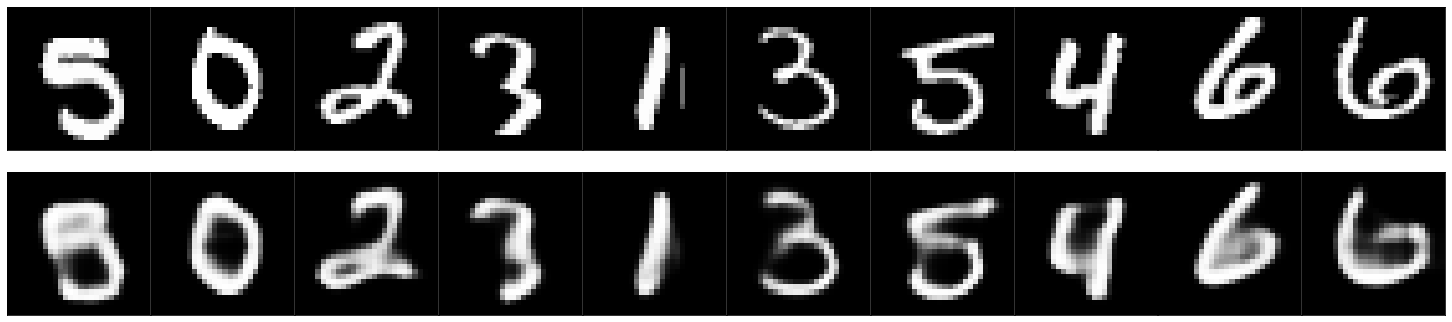

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 1


100%|██████████| 550/550 [05:54<00:00,  1.56it/s]


Training loss after Epoch 2 = 0.096


<Figure size 432x288 with 0 Axes>

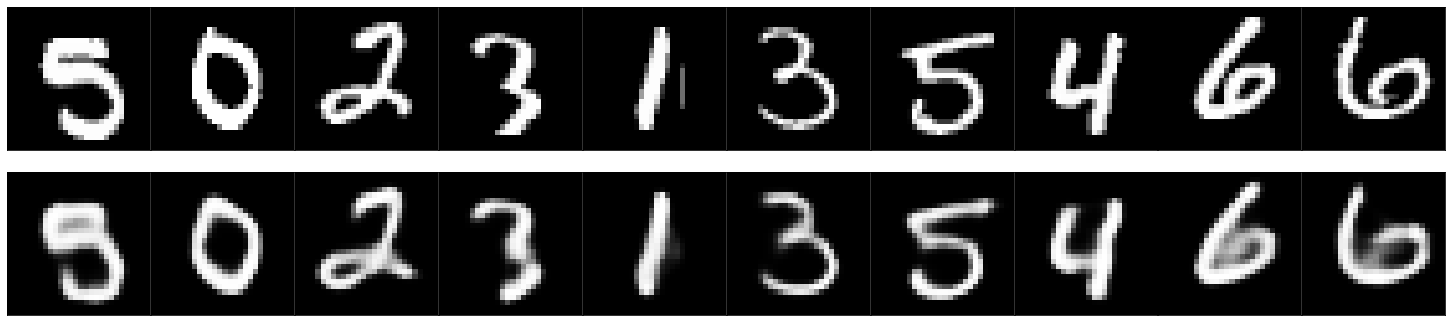

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 2


100%|██████████| 550/550 [05:52<00:00,  1.57it/s]


Training loss after Epoch 3 = 0.079


<Figure size 432x288 with 0 Axes>

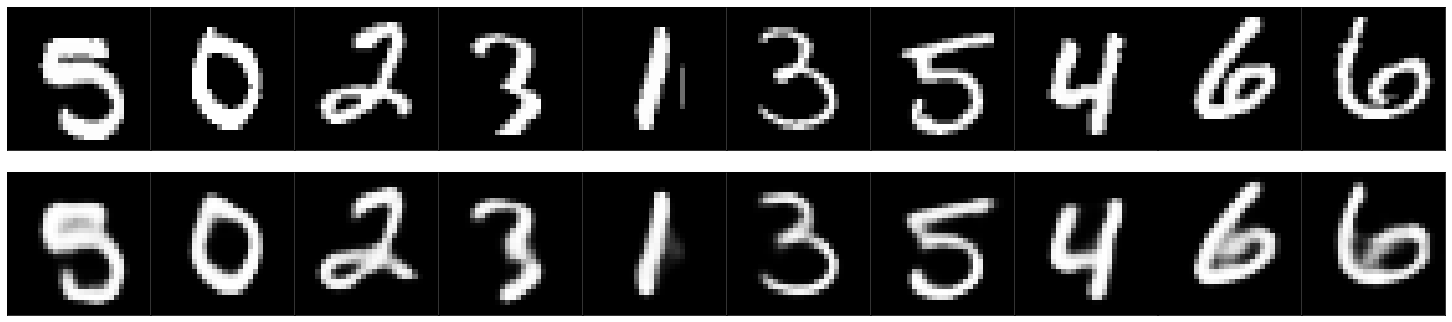

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 3


100%|██████████| 550/550 [05:49<00:00,  1.58it/s]


Training loss after Epoch 4 = 0.089


<Figure size 432x288 with 0 Axes>

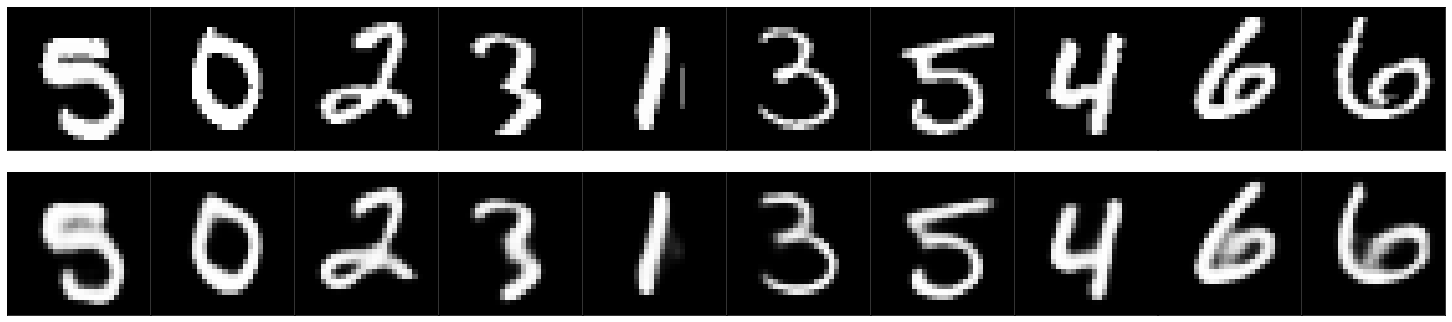

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 4


100%|██████████| 550/550 [05:50<00:00,  1.58it/s]


Training loss after Epoch 5 = 0.085


<Figure size 432x288 with 0 Axes>

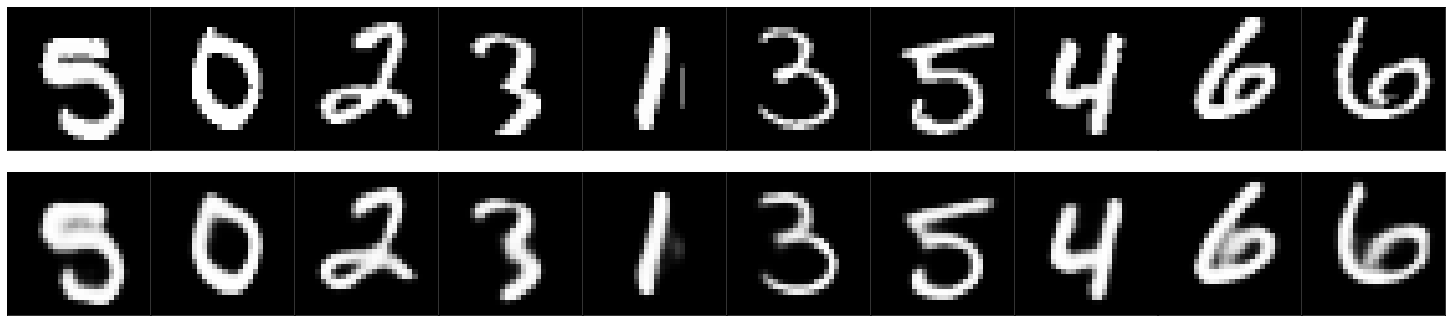

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 5


100%|██████████| 550/550 [05:50<00:00,  1.57it/s]


Training loss after Epoch 6 = 0.083


<Figure size 432x288 with 0 Axes>

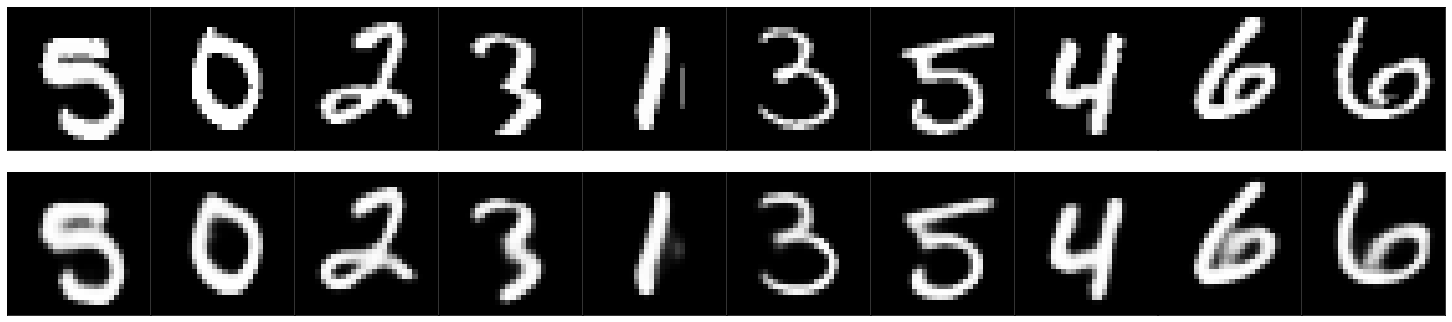

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 6


100%|██████████| 550/550 [05:50<00:00,  1.56it/s]


Training loss after Epoch 7 = 0.078


<Figure size 432x288 with 0 Axes>

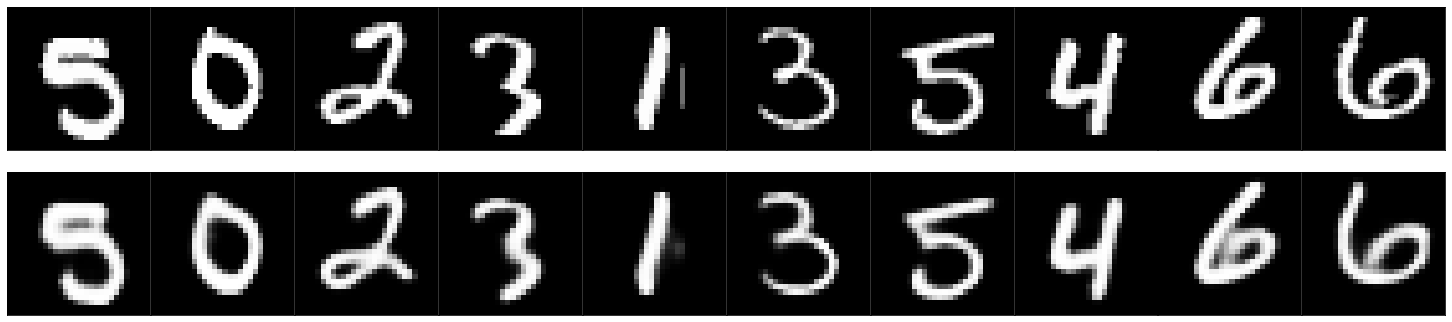

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 7


100%|██████████| 550/550 [05:52<00:00,  1.57it/s]


Training loss after Epoch 8 = 0.079


<Figure size 432x288 with 0 Axes>

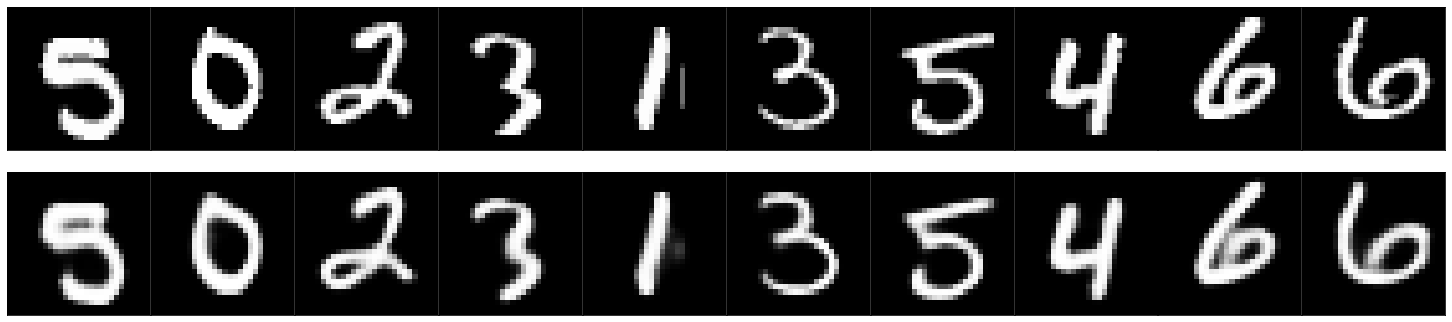

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 8


100%|██████████| 550/550 [05:50<00:00,  1.58it/s]


Training loss after Epoch 9 = 0.078


<Figure size 432x288 with 0 Axes>

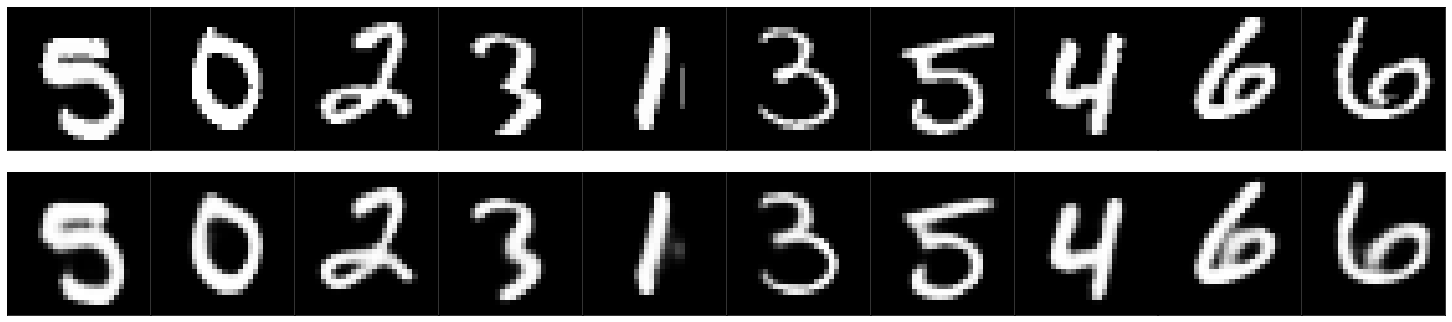

  0%|          | 0/550 [00:00<?, ?it/s]


Epoch 9


100%|██████████| 550/550 [05:57<00:00,  1.53it/s]


Training loss after Epoch 10 = 0.079


<Figure size 432x288 with 0 Axes>

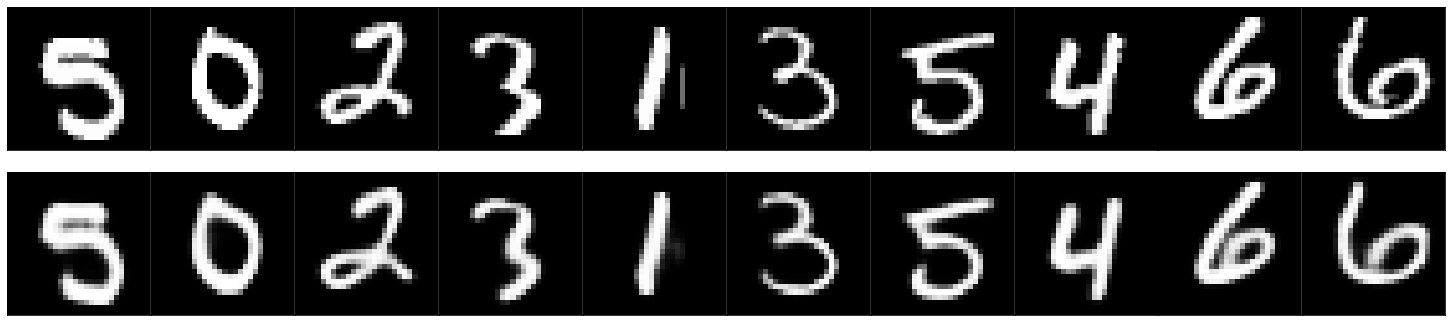

In [0]:
vaecnn = VAEConvolutionalNeuralNet(input_data.read_data_sets("data", one_hot=True), (28,28), (28,28))
vaecnn.encode()
vaecnn.decode()
vaecnn.compile_()
vaecnn.train(epochs=10, batch_size=100)